In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.9691358024691358, Loss: 0.2756278603165238
Checkpoint 200, Accuracy: 0.9691358024691358, Loss: 0.12731839992381908
Checkpoint 300, Accuracy: 0.9691358024691358, Loss: 0.10599251146669741
Checkpoint 400, Accuracy: 0.9691358024691358, Loss: 0.10581008593241374
Checkpoint 500, Accuracy: 0.9691358024691358, Loss: 0.10517949528164333


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.9222933  0.0765422  0.00116456]
[1. 0. 0.] <-> [0.99489623 0.00392369 0.00118008]
[0. 0. 1.] <-> [5.6881979e-03 1.5345842e-05 9.9429649e-01]
[1. 0. 0.] <-> [0.9957312  0.00146434 0.00280453]
[1. 0. 0.] <-> [0.9969704  0.00139998 0.00162954]
[1. 0. 0.] <-> [0.99639565 0.00237558 0.00122877]
[1. 0. 0.] <-> [0.99406636 0.0012751  0.0046585 ]
[1. 0. 0.] <-> [0.99611485 0.00267961 0.00120546]
[1. 0. 0.] <-> [0.9922632  0.00122085 0.006516  ]
[1. 0. 0.] <-> [0.99620193 0.00113855 0.0026596 ]
[0. 0. 1.] <-> [5.6217099e-03 1.5180447e-05 9.9436307e-01]
[0. 0. 1.] <-> [5.6223874e-03 1.5182117e-05 9.9436247e-01]
[1. 0. 0.] <-> [0.9964412  0.00231882 0.00124   ]
[0. 1. 0.] <-> [9.9334773e-03 9.9005568e-01 1.0821798e-05]
[1. 0. 0.] <-> [0.99709153 0.00133051 0.00157793]
[0. 1. 0.] <-> [6.0501592e-03 9.9394315e-01 6.5777399e-06]
[1. 0. 0.] <-> [0.9968539  0.00170637 0.00143978]
[1. 0. 0.] <-> [0.95095724 0.00190662 0.04713613]
[0. 0. 1.] <-> [5.6551490e-03 1.5262067e-05 9.9432963e-

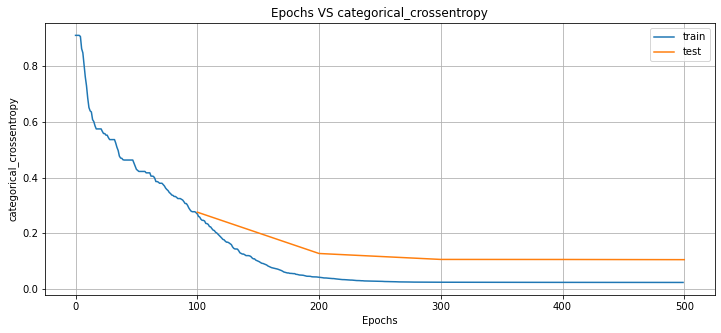

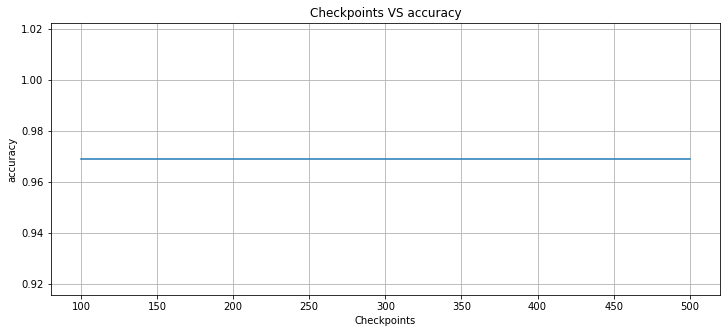

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9691358024691358, 'mean_square_error': 0.12471548085033703, 'categorical_crossentropy': 0.2756278603165238, 'essential_metrics': {0: {'tp_hit': 79, 'fp_hit': 4, 'tn_hit': 24, 'fn_hit': 1}, 1: {'tp_hit': 14, 'fp_hit': 1, 'tn_hit': 92, 'fn_hit': 1}, 2: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 3}}, 'checkpoint': 100} 


{'accuracy': 0.9691358024691358, 'mean_square_error': 0.07003193302668886, 'categorical_crossentropy': 0.12731839992381908, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 3, 'tn_hit': 25, 'fn_hit': 2}, 1: {'tp_hit': 14, 'fp_hit': 1, 'tn_hit': 92, 'fn_hit': 1}, 2: {'tp_hit': 11, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 2}}, 'checkpoint': 200} 


{'accuracy': 0.9691358024691358, 'mean_square_error': 0.058561708500517236, 'categorical_crossentropy': 0.10599251146669741, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 2, 'tn_hit': 26, 'fn_hit': 3}, 1: {'tp_hit': 14, 'fp_hit': 1, 'tn_hit': 92, 'fn_hit': 1}, 2: {'tp_hit': 12, 'fp_hit': 2, 'tn_hit': 93,

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[ 0.1069596 -3.        -1.1422421  1.2350762  3.       ]
 bias: -3.0

Neuron 1: weights:
[-1.9488022   3.          2.0458097   0.36667013 -2.352924  ]
 bias: -3.0

Neuron 2: weights:
[ 0.0471915  3.        -0.2471983 -1.4905349 -3.       ]
 bias: 2.331153392791748

Neuron 3: weights:
[ 1.8365119  -3.         -2.1888456  -0.34286836  2.2824333 ]
 bias: 3.0

$
Layer 2
Neuron 0: weights:
[-3. -3.  3.  3.]
 bias: -0.035535894334316254

Neuron 1: weights:
[-3.         3.         2.0609746 -3.       ]
 bias: 0.05008036643266678

Neuron 2: weights:
[ 3. -3. -3.  3.]
 bias: -0.8600658774375916

$

